## Downloading EO Polygons with GEE

In [18]:
import terragon
import geopandas as gpd
from pathlib import Path
import xarray as xr
import ee
import matplotlib.pyplot as plt
from utils import visualize_sat_images

In [19]:
# we will use the sample data to download a minicube
gdf = gpd.read_file("data/TUM_OTN.geojson")
arguments = dict(shp=gdf,
                collection='COPERNICUS/S2_SR_HARMONIZED',
                start_date='2021-01-01',
                end_date='2021-01-05',
                bands=['B2', 'B3', 'B4'],
                resolution=10,
                download_folder='tests/download/'
)
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Initialize GEE

In [20]:
# ee.Authenticate() # authenticate if needed and not done before (providing credentials)
ee.Initialize(opt_url='https://earthengine-highvolume.googleapis.com')

download (with geedim backend)

In [21]:
tg = terragon.init('gee') # credentials are provided through ee.Authenticate()

In [22]:
# clipped tile tifs are downloaded with geedim and then merged into a single xarray dataset
ds = tg.create(**arguments, num_workers=10)
# or 
# items = tg.search(**arguments, num_workers=10)
# ds = tg.download(items, remove_tmp=False) # do not remove the temporary downloaded files
ds

<xarray.Dataset> Size: 8kB
Dimensions:      (time: 2, y: 16, x: 40)
Coordinates:
  * x            (x) float64 320B 11.65 11.65 11.65 11.65 ... 11.66 11.66 11.66
  * y            (y) float64 128B 48.06 48.06 48.06 48.06 ... 48.05 48.05 48.05
    spatial_ref  int64 8B 0
  * time         (time) datetime64[ns] 16B 2021-01-01 2021-01-03
Data variables:
    B2           (time, y, x) uint16 3kB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    B3           (time, y, x) uint16 3kB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    B4           (time, y, x) uint16 3kB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
Attributes:
    crs:          EPSG:4326
    data_source:  GEE
    collection:   COPERNICUS/S2_SR_HARMONIZED

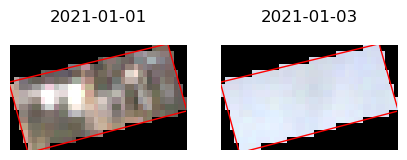

In [23]:
visualize_sat_images(ds, gdf, ["B4", "B3", "B2"])

In [25]:
# the ouptut of the search is an ee ImageCollection
tg.search(**arguments)